<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

# Using CV Dazzle to understand (and fight) surveillance technology



In [ ]:
#@title Run to load data and helper functions

import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
!wget --no-check-certificate 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml' -O haarcascade_frontalface_default.xml
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1DUGu4sRQxKo4jw92Jk7eI9H0RoGMdYuq' -O look1.jpg
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QRWArBwFjcAnjX1dwhjb-QnSzL6vAI0J' -O look2.jpg

!pip install dlib
!wget -O ./shape_predictor_68_face_landmarks.dat "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/shape_predictor_68_face_landmarks.dat"
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'
!wget http://arunponnusamy.com/files/mmod_human_face_detector.dat
import dlib

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


def take_webcam_photo():
  from IPython.display import Image
  try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

--2021-10-17 18:50:21--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2021-10-17 18:50:21 (19.3 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2021-10-17 18:50:21--  https://docs.google.com/uc?export=download&id=1DUGu4sRQxKo4jw92Jk7eI9H0RoGMdYuq
Resolving docs.google.com (docs.google.com)... 74.125.132.101, 74.125.132.138, 74.125.132.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.132.101|:443... connected.
HTTP request sent, awaiting response... 302 Mov

Use `cv2.imread` to read in `./look1.jpg` and `./look1.jpg`, then use `cv2_imshow` to display those images.

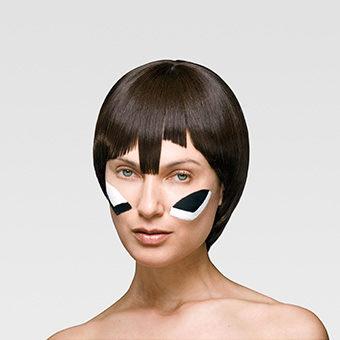

In [ ]:
### YOUR CODE HERE
adversarial = cv2.imread("./look1.jpg")
cv2_imshow(image)

Now we're going to build a simple Harr Cascade face detector. Below, fill in the missing print statements and rectangle drawing parameters.

In [ ]:
def detect_face(img):
  # Load the cascade
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Detect faces
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)
  if len(faces) > 0:
    pass
    print("Face found")
  else:
    pass
    print("No face found")
  # Draw rectangle around the faces
  for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

  # Display the output
  #YOUR CODE HERE
  cv2_imshow(img)

Let's see how OpenCV performs on face detection for pictures of the same model with and without Dazzle makeup:

No face found


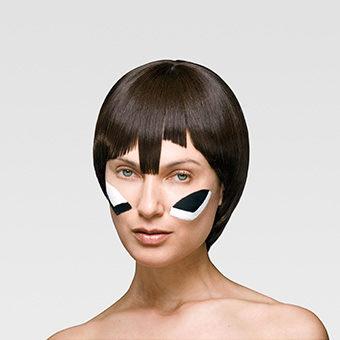

In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
normal = cv2.imread("./look1.jpg")
detect_face(normal)

Now let's see how DCNN models work against these same protections!

In [ ]:
def detect_face_cnn(image):

  # initialize cnn based face detector with the weights
  cnn_face_detector = dlib.cnn_face_detection_model_v1('./mmod_human_face_detector.dat')

  faces_cnn = cnn_face_detector(image, 1)

  for face in faces_cnn:
      x = face.rect.left()
      y = face.rect.top()
      w = face.rect.right() - x
      h = face.rect.bottom() - y

      # draw box over face
      cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 2)

  #Display image
  #YOUR CODE HERE
  cv2_imshow(image)


Let's test it out!

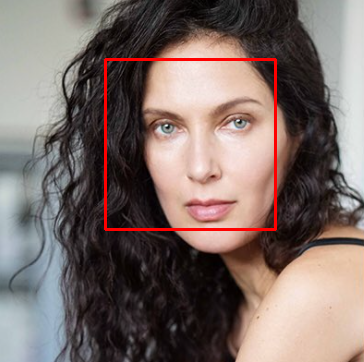

In [ ]:
#YOUR CODE HERE
normal = cv2.imread("./look2.jpg")
detect_face_cnn(normal)

Now let's use your built-in webcam to see if you can fool the two detectors:

In [ ]:
take_webcam_photo()
yourface = cv2.imread('./photo.jpg')
detect_face(yourface)
detect_face_cnn(yourface)